**CASE: Breast Cancer**<BR>
**METHOD: K-Nearest Neighbors**
<br>
*Magister of Data Science & Artificial Intelligence USU - Copyright@2025 - With All Reserved*

**PROGESS: DONE 100%**

# **1. DATA PREPATION & STRUCTURE**
> * Sumber data diambil dari https://archive.ics.uci.edu/dataset/14/breast+cancer
> * **Objective**: Apakah pasien berisiko mengalami kekambuhan kanker (*recurrence*) atau tidak (*no-recurrence*), berdasarkan fitur-fitur seperti usia, ukuran tumor, status menopause, dsb.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.feature_selection import mutual_info_classif

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"

df = pd.read_csv(url, header=None)

>**1.1 Struktur Data**<br>
>  Menampilkan 5 data pertama

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


> **Deskripsi:** <br>
*   Menampilkan 5 data pertama, pada `dataset` column belum terdefenisi, masih bentuk `index 0..n`. Informasi `features` dapat dilihat pada URL berikut: https://archive.ics.uci.edu/dataset/14/breast+cancer pada sesi `variable table`
*   **Tindak lanjut:** Selanjutnya akan diberi labeling `column` untuk kemudahan pembacaan awal dataset



In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
df.shape

(286, 10)

In [ ]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

> **1.2 Defenisi Fitur**

In [ ]:
df.columns = [
    "class",         # kolom 0
    "age",           # kolom 1
    "menopause",     # kolom 2
    "tumor_size",    # kolom 3
    "inv_nodes",     # kolom 4
    "node_caps",     # kolom 5
    "deg_malig",     # kolom 6
    "breast",        # kolom 7
    "breast_quad",   # kolom 8
    "irradiat"       # kolom 9
]

df.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


> * `age:` Rentang usia pasien.
> * `menopause`: Menopause adalah proses biologis alami yang menandai berakhirnya siklus menstruasi wanita.
> * `tumer-size:` Ukuran tumor mengacu pada dimensi atau ukuran tumor. Dalam diagnosis dan pengobatan kanker, ukuran tumor sering digunakan untuk menentukan stadium penyakit.
> * `inv-nodes:` INV Nodes adalah jumlah (rentang 0 - 39) kelenjar getah bening aksila yang mengandung kanker payudara metastasis yang terlihat pada pemeriksaan histologis.
> * n`ode-caps:` jika kanker bermetastasis ke kelenjar getah bening, meskipun di luar lokasi tumor asli, kanker mungkin tetap "terkurung" oleh kapsul kelenjar getah bening.
> * `deg-malig:` Salah satu penyebab utama kematian adalah kanker. Kanker yang paling umum pada wanita adalah kanker payudara.
> * `breast:` Posisi payudara.
> * `breast-quad`: Payudara dibagi menjadi 4 kuadran dengan puting susu sebagai pusatnya. iradiasi: Iradiasi, juga dikenal sebagai terapi radiasi, adalah pengobatan umum untuk kanker payudara.
> * `kelas:` Ini adalah atribut target yang digunakan untuk mengklasifikasikan situasi di mana ada kekambuhan atau tidak ada kekambuhan kanker

> **1.3 Distribusi Target Class**

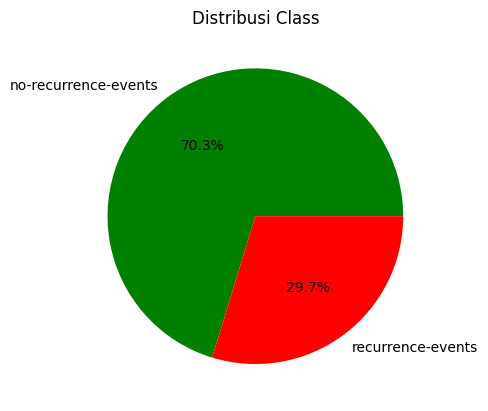

In [ ]:
# Hitung jumlah tiap class
class_counts = df['class'].value_counts()

# Pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribusi Class')
plt.show()

# **2. DATA PREPROCESSING**
> * Data preprocessing pada kasus ini melibatkan tahapan yg mungkin akan overlap dengan EDA. Penanganan berupa: `missing values`, `data cleansing`, `data transformation`


>**2A. Data Information & Data Type**<br>
>  Menyajikan tipe data fitur, termasuk jumlah baris, dan fitur

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


>**Deskripsi**: <br>
*  Total `instances` terdiri dari `286` dan `10 features `pada dataset
*   Setiap `feature` tampak tidak memiliki value` non-value (NaN)`, seolah-olah semuanya memiliki jumlah `286` (tidak mengandung `missing values`), padahal bisa saja terdapat `missing values`
*   Setiap `features` memiliki tipe data `object`, kecuali feature pada `index ke-`6 `(deg-malig)`, selanjutnya akan dilakukan koreksi terhadapa tipe data pada tahap standardisasi/scaling/normalisasi

> **Tipe Data**
*   Berdasarkan explorasi awal pada `df.head()`, untuk tujuan komputasi machine learning, fitur wajib dikonversi kenumeric. Secara umum, fitur dapat dikelompokkan sesuai karakter instancesnya: **Uni/Multi Class Encoding** (`class`, `menopause`, `breast_quad`, `irradiat`, `node_caps`, `breast`), **Kategori Ordinal/Range-based** (`age`, `tumor_size`, `inv_nodes`, `deg_malig`)
*   Seluruh tipe data fitur perlu diubah ke `FloatInt`

>**2B. Missing Values**<br>
>  Meskipun pada, `cell code df.info()` seluruh feature menyajikan `286 non-null`, perlu dilakukan investigasi untuk memastikan tidak ada karakter unique seperti `'?'` perlu di convert ke `NaN` sebagai `missing values` dan penanganannya

In [ ]:
df[df.isin(['?']).any(axis=1)]

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


> * Tanda `'?'` perlu di ubah ke `NaN` sebagai `flag missing values` penangannnya.

In [ ]:
df.replace('?', np.nan, inplace=True)
missing_counts = df.isna().sum()
missing_counts

,0
class,0
age,0
menopause,0
tumor_size,0
inv_nodes,0
node_caps,8
deg_malig,0
breast,0
breast_quad,1
irradiat,0


In [ ]:
miss_node_caps = df[df['node_caps'].isna()].copy()
miss_breast_quad = df[df['breast_quad'].isna()].copy()

In [ ]:
miss_node_caps

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no


In [ ]:
miss_breast_quad

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,NaN,no


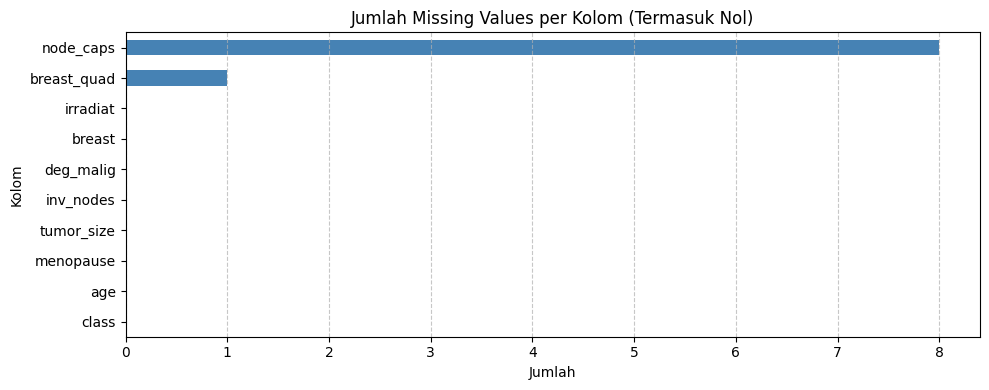

In [ ]:
all_missing = df.isna().sum()
plt.figure(figsize=(10, 4))
all_missing.sort_values().plot(kind='barh', color='steelblue')
plt.title("Jumlah Missing Values per Kolom (Termasuk Nol)")
plt.xlabel("Jumlah")
plt.ylabel("Kolom")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> * Terdapat **Missing Values** pada fitur `node_caps: 8`  dan `breast_quad: 1` <br>`node_caps` hanya `222` → Ada `64 missing`<br>
`breast_quad` hanya `110` → Ada `176 missing`<br>
* Selanjutnya penanganan **missing value** tsb akan dilakukan pada tahapan preprocessing
> * fitur `breast_quad`: Menunjukkan lokasi spesifik tumor pada payudara pasien, dibagi ke dalam beberapa kuadran `(left-up, left-low, right-up, left-low, center`). Menentukan pola lokasi cancer, bisa punya pengaruh untuk klasifikasi. sumber: https://archive.ics.uci.edu/dataset/14/breast+cancer
> * `node_caps` indikator apakah node getah bening pasien memiliki kapsul atau tidak, dengan value *Yes* or *No*. Adanya kapsul bisa menunjukkan penyebaran atau keganasan kanker
> * **MENGINGAT** pentingnya kedua fitur tersebut yang menginformasikan penyebaran kanker dan lokasi serangan kanker. Maka fitur tersebut dilakukan `imputing` strategy `modulus`, untuk mempertahankan frekuensi dan distribusi data kategorikal

In [ ]:
### ------------------- IMPUTING ------------------#

# --- Imputasi 'node_caps' pakai SIM & HAMM ---
from collections import Counter
import numpy as np

# Salin df dan encode 'node_caps' untuk memudahkan imputasi (0: no, 1: yes)
df_encoded = df.copy()
df_encoded['node_caps'] = df_encoded['node_caps'].map({'no': 0, 'yes': 1})

# Cek missing pada node_caps
missing_node_caps_index = df_encoded[df_encoded['node_caps'].isna()].index

# Pisahkan data lengkap dan data yang missing pada node_caps
complete_node_caps = df_encoded[df_encoded['node_caps'].notna()]
missing_node_caps = df_encoded.loc[missing_node_caps_index]

# Fungsi perhitungan kemiripan SIM & HAMM
def delta(a, b): return int(a == b)

def impute_sim_hamm(row, complete_df):
    # Pastikan kolom yang digunakan untuk SIM dan HAMM sudah tidak mengandung missing values
    complete_df = complete_df.dropna(subset=['deg_malig', 'tumor_size', 'irradiat'])

    # Menghitung kemiripan antara baris yang hilang dengan baris lengkap
    sim_scores = [(comp['node_caps'],
                   sum(delta(row[c], comp[c]) for c in ['deg_malig', 'tumor_size', 'irradiat']))
                  for _, comp in complete_df.iterrows()]

    # Jika ada kemiripan tertinggi, pilih berdasarkan nilai terbanyak
    top_sim = [val for val, score in sim_scores if score == max(s[1] for s in sim_scores)]
    count = Counter(top_sim)

    if len(count) == 1:
        return list(count.keys())[0]
    else:
        # Jika terjadi tie, gunakan Hamming distance
        hamm_scores = [(comp['node_caps'],
                        sum(row[c] != comp[c] for c in ['deg_malig', 'tumor_size', 'irradiat']))
                       for _, comp in complete_df.iterrows()]
        min_hamm = min(h[1] for h in hamm_scores)
        candidates = [h[0] for h in hamm_scores if h[1] == min_hamm]
        return Counter(candidates).most_common(1)[0][0]

# Imputasi nilai hilang pada node_caps
for idx, row in missing_node_caps.iterrows():
    df_encoded.at[idx, 'node_caps'] = impute_sim_hamm(row, complete_node_caps)

# Mapping kembali ke nilai asli (yes/no)
df['node_caps'] = df_encoded['node_caps'].map({0: 'no', 1: 'yes'})

# Simpan representasi hasil imputasi node_caps
miss_node_caps = df.loc[missing_node_caps_index]

# --- Imputasi 'breast_quad' pakai KNNImputer ---
from sklearn.impute import KNNImputer

# Salin df untuk breast_quad
df_bq = df.copy()

# Mapping breast_quad jadi kode angka sebelum imputasi
df_bq['breast_quad_cat'] = df_bq['breast_quad'].astype('category')
df_bq['breast_quad_code'] = df_bq['breast_quad_cat'].cat.codes.replace(-1, np.nan)

# Imputasi menggunakan KNN
knn_imputer = KNNImputer(n_neighbors=5)
df_bq[['breast_quad_code']] = knn_imputer.fit_transform(df_bq[['breast_quad_code']])

# Mapping kembali ke kategori asli
mapping = dict(enumerate(df_bq['breast_quad_cat'].cat.categories))
df['breast_quad'] = df_bq['breast_quad_code'].round().astype(int).map(mapping)

# Simpan representasi hasil imputasi breast_quad
miss_breast_quad = df.loc[df_bq['breast_quad'].isna()]

# Cek hasil imputasi
print("Missing data after imputing:")
print(df.isna().sum())

# Tampilkan hasil imputasi
print("miss_node_caps head after imputasi:")
print(miss_node_caps.head())

print("\nmiss_breast_quad head after imputasi:")
print(miss_breast_quad.head())


Missing data after imputing:
class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64
miss_node_caps head after imputasi:
                    class    age menopause tumor_size inv_nodes node_caps  \
145  no-recurrence-events  40-49   premeno      25-29       0-2        no   
163  no-recurrence-events  60-69      ge40      25-29       3-5        no   
164  no-recurrence-events  60-69      ge40      25-29       3-5        no   
183  no-recurrence-events  50-59      ge40      30-34      9-11        no   
184  no-recurrence-events  50-59      ge40      30-34      9-11        no   

     deg_malig breast breast_quad irradiat  
145          2   left   right_low      yes  
163          1  right     left_up      yes  
164          1  right    left_low      yes  
183          3   left     left_up      yes  
184          3   left    left_low      yes  

miss_breast_quad h

> Tampilan 5 data pertama setelah imputasi **missing values** bold text

In [ ]:
miss_node_caps.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,no,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,no,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,no,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,no,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,no,3,left,left_low,yes


In [ ]:
miss_breast_quad.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,left_up,no


In [ ]:
df.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
# re-check missing values
missing_counts = df.isna().sum()
missing_counts

,0
class,0
age,0
menopause,0
tumor_size,0
inv_nodes,0
node_caps,0
deg_malig,0
breast,0
breast_quad,0
irradiat,0


> **Interprestasi Hasil Tahapan Preprocessing Awal**
>*   Hasil tahapan `preprocessing` awal menunjukkan dataset sudah tidak mengandung `missing values`.
>*   Seluruh instances tidak memiliki nilai yg `inconcistency`, `irrellavant`, dan `incorrect`
>*   Tahapan selanjutya EDA untuk eksplorasi `outliers`, `imbalanced`, `distribusi data`, `fitur korelasi `sebelum dilakukan `scaling (normalisasi)` dan `encoding` numerik

# **3. EXPLORATORY DATA ANALYSIS (EDA)**
> Penelaah data untuk ekstraksi insight meliputi:
> * Distribusi Data
> * Outliers Detection
> * (re-preprocessing) Scaling and Encoding
> * Feature Correlation
> * Feature Selection
> * (re-preprocessing) Normalization/Scaling or Transformation


>**3.1 Statistik Deskriptif (Data Distribution)**<br>
>  Menyajikan statistik deskriptif untuk kolom numerik seperti mean, min, max, dan standar deviasi.

In [ ]:
df.describe()

,deg_malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


>**3.1.1 Frekuensi Fitur Dalam Dataset**<br>
> * Menyajikan frekuensi setiap fitur pada dataset, dengan tujuan untuk memahami struktur data setiap fitur dari valuenya, apakah `numeric` (kontinue/discret) atau `categorical`. Hal sesuai dari teori dalam buku John Tukey tentang fundamental EDA 1966 tentang pengelompakan data
> *  Dengan memahami karakter value setiap column, maka dapat ditentukan metode apa yg akan diterapkan nantinya untuk proses encoding, transformation ataupun normalisasi

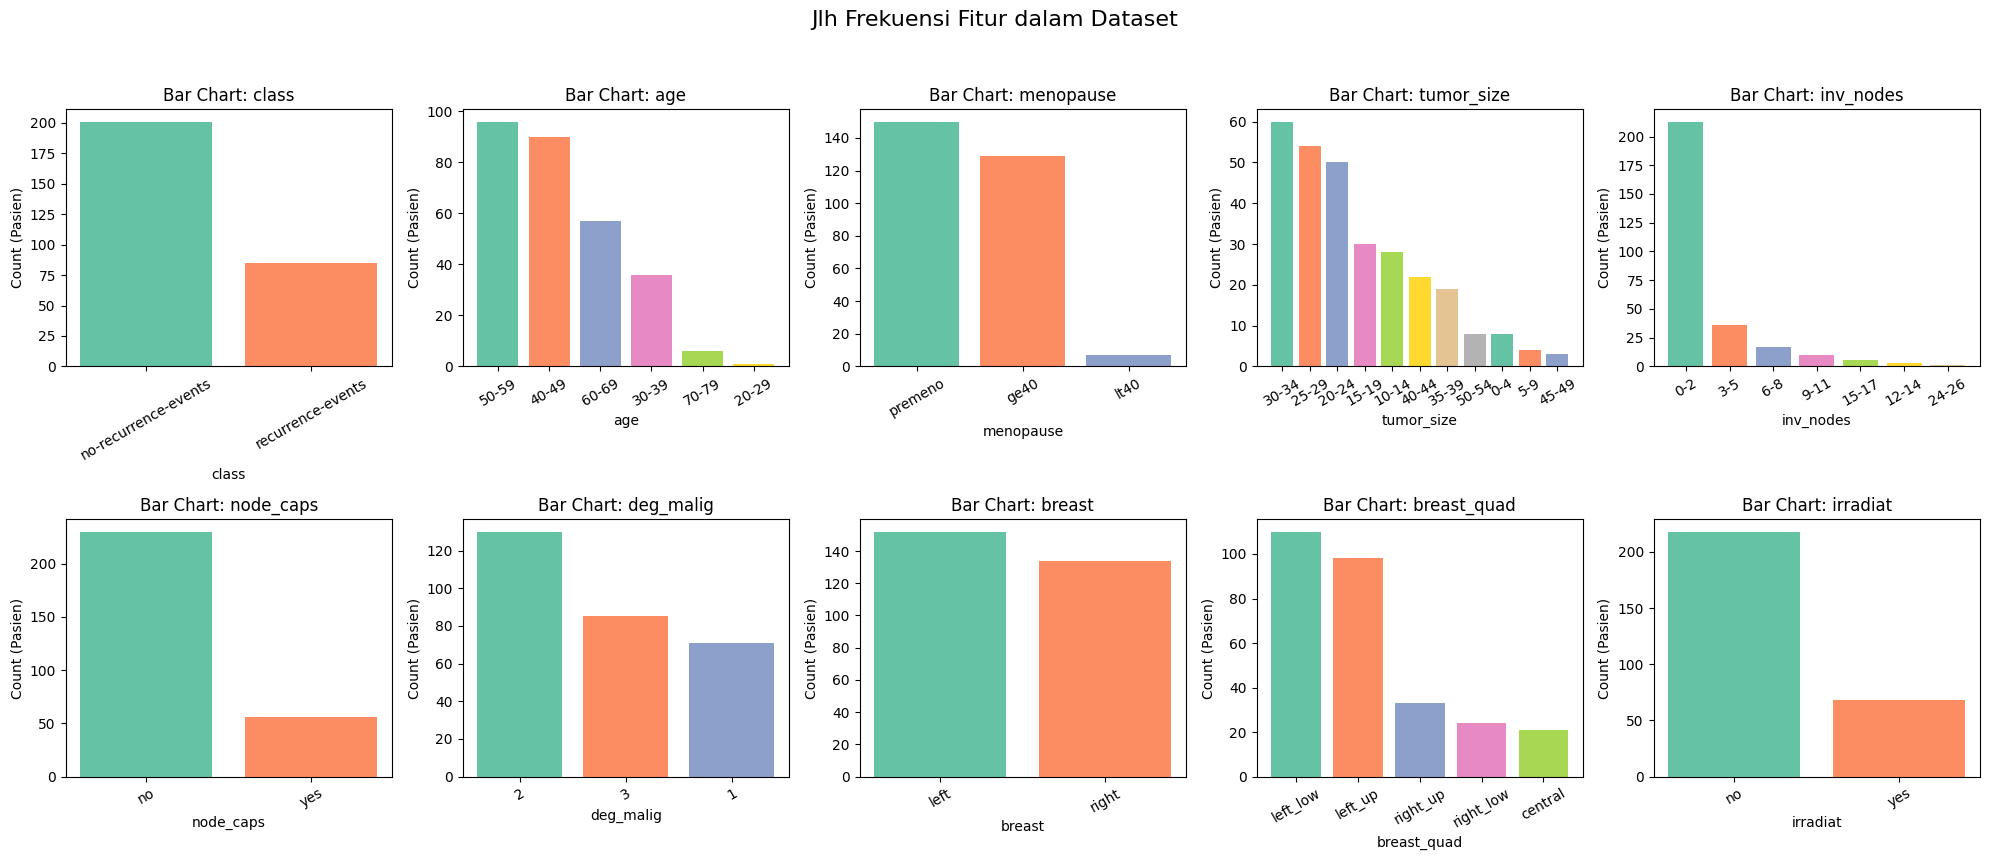

In [ ]:
columns = ['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps',
           'deg_malig', 'breast', 'breast_quad', 'irradiat']
# Pilih palet warna halus
colors = sns.color_palette("Set2", n_colors=10)  # atau pakai "pastel", "husl", dll

# Buat subplot 2 baris x 5 kolom
fig, axes = plt.subplots(2, 5, figsize=(20, 9))
fig.suptitle('Jlh Frekuensi Fitur dalam Dataset', fontsize=16)

# Loop tiap fitur dan buat bar chart dengan warna berbeda
for ax, column, color in zip(axes.flat, columns, colors):
    counts = df[column].value_counts()
    bars = ax.bar(counts.index.astype(str), counts.values, color=sns.color_palette("Set2", n_colors=len(counts)))
    ax.set_title('Bar Chart: '+ column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count (Pasien)')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> **Insight:**
> * Dari **Barcart 3.1.1** insight yang diperoleh, semua fitur data adalah categorical, sehingga dari identifikasi yang diperoleh data dapat dikelompokkan ke dalam jenis category berikut:.
> * **Binary Categorical** (`class`, `node_caps`, `irradiat`). Method: `Label Encoding`. `Class` adalah fitur target sedangkan node_caps, dan irradiat dlm konteks KNN jarak ecludian berada pada rentan 1 satuan dari value biner 0 dan 1
> * **Nominal Categorical** (`mesopause`, `breast`, `breast_quad`) -> Method: `One-Hot Encoding`
> * **Ordinal Categorical** (`age`, `tumor_size`, `inv_nodes`, `deg_malig`) -> Method: `Ordinal Encoding`

>**3.1.2 Data Distribution**<br>
> * Menyajikan sebaran (distribution) data kontinue atau diskrit, dari `insight 3.1.1` diperolah tipe data tsb pada fitur `age`, `tumor_size`, dan `inv_nodes`
> * Untuk kasus tertentu, dapat mendeteksi `outliers`

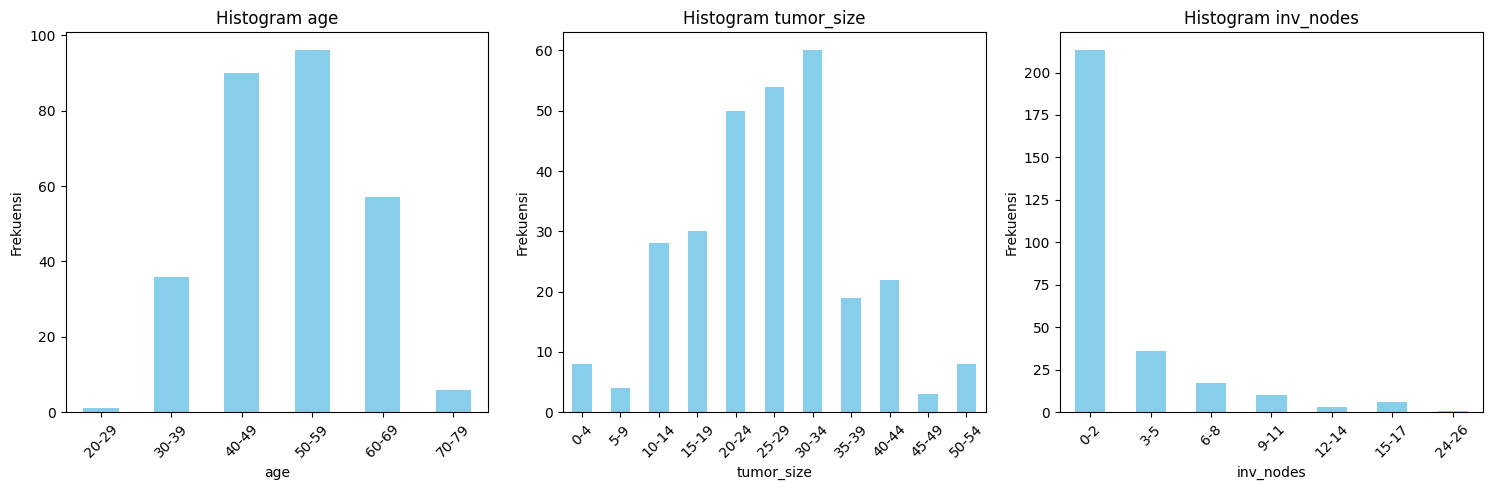

In [ ]:
# ---- Sort category utk visualization
kategori_map = {
    'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
    'tumor_size': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
                   '30-34', '35-39', '40-44', '45-49', '50-54'],
    'inv_nodes': ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26']
}

# ----  copy agar tidak merusak df asli
df_plot = df.copy()

# ---- Konversi setiap kolom ke kategori dengan urutan yang benar
for col, cat_order in kategori_map.items():
    df_plot[col] = pd.Categorical(df_plot[col], categories=cat_order, ordered=True)

#----- visualisasikan
features_for_hist = ['age', 'tumor_size', 'inv_nodes']
plt.figure(figsize=(20, 5))
for i, feature in enumerate(features_for_hist):
    plt.subplot(1, 4, i + 1)
    df_plot[feature].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


> **Insight:**
> * Pada `histogram age`, tampak bahwa data berdistribusi normal dengan puncak distribusi 40-59, menunjukkan bahwa sampling kasus breast cancer umumnya menyerang wanita paruh baya pada rentan di usia 40-49 dan 50-59 tahun. Sedangkan kelompok usia 20–29 dan 70–79 memiliki jumlah yang sangat sedikit. Dalam konteks outlier, usia sangat muda dan sangat tua ini bisa dianggap sebagai outlier secara frekuensi, karena mereka jauh dari pusat distribusi dan bisa mewakili kasus khusus seperti kanker payudara dini atau lanjut usia.
> * `tumor_size` Distribusi menumpuk pada ukuran 25–34 mm. Ukuran kecil (0–4) dan besar (50–54) sangat sedikit. Mengidinkasikan bahwa mayoritas pasien memiliki tumor berukuran sedang (25-34 mm). Namun, kategori ekstrem seperti 0–4 mm dan 50–54 mm memiliki frekuensi rendah, sehingga secara statistik dan klinis, ukuran tumor yang terlalu kecil atau sangat besar ini berpotensi menjadi outlier, baik dari sisi deteksi dini maupun keterlambatan diagnosis.
>* `inv_nodes` Histogram tampak **right-skewed**, dengan right tail yg panjanga. Hipotesis awal data ini bisa mengidentikasikan ketidakseimbangan atau `outlier`,  dominan besar di kategori 0–2.  Mayoritas pasien tidak menunjukkan penyebaran cancer ke banyak kelenjar, hanya sedikit yang berada di kategori stadium lanjut.
> * Dalam konteks ML, range data tersebut perlu di rescaling untuk mencegah dominasi fitur

>**3.1.3 Outliers**<br>
>  Dari kecurigaan adanya outliers pada histogram pada subtopic 3.1.2, dilakukan analisi lanjut dengat boxplot

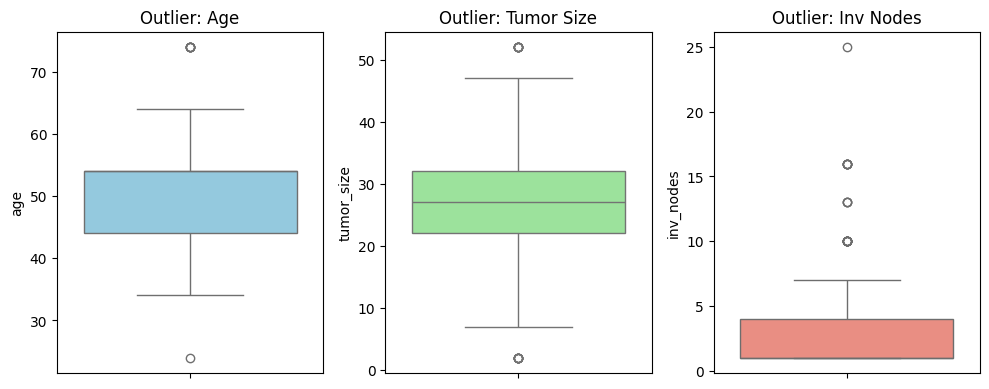

In [ ]:
df_outlier = df.copy()
def range_to_midpoint(value):
    start, end = value.split('-')
    return (int(start) + int(end)) // 2
df_outlier['age'] = df_outlier['age'].apply(range_to_midpoint)
df_outlier['tumor_size'] = df_outlier['tumor_size'].apply(range_to_midpoint)
df_outlier['inv_nodes'] = df_outlier['inv_nodes'].apply(range_to_midpoint)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_outlier['age'], color='skyblue')
plt.title("Outlier: Age")
plt.subplot(1, 3, 2)
sns.boxplot(y=df_outlier['tumor_size'], color='lightgreen')
plt.title("Outlier: Tumor Size")
plt.subplot(1, 3, 3)
sns.boxplot(y=df_outlier['inv_nodes'], color='salmon')
plt.title("Outlier: Inv Nodes")
plt.tight_layout()
plt.show()

> **Insight**
> * `age`: Sebagian besar pasien berada di usia 35–65 tahun, ditunjukkan oleh kotak (IQR) yang cukup simetris di tengah. Namun, terlihat dua titik di luar whisker, yaitu usia sekitar 25 dan 75 tahun. Keduanya merupakan outlier, karena jauh dari rentang normal distribusi usia pasien, dan bisa mengindikasikan kasus kanker pada usia yang sangat muda maupun sangat tua.
> * `tumor_size`: Ukuran tumor pasien paling banyak berkisar antara 20–40 mm. Dua outlier terlihat jelas di luar whisker: satu di bawah (sekitar 4 mm, tumor sangat kecil) dan satu di atas (sekitar 52 mm, tumor sangat besar). Outlier ini menunjukkan adanya variasi ekstrem dalam ukuran tumor, yang bisa berkaitan dengan deteksi dini atau justru diagnosis yang terlambat.
> * Distribusi `inv_nodes` sangat padat di nilai rendah (0–6), dan memanjang ke atas dengan beberapa titik yang sangat tinggi seperti 10, 13, 15, hingga 25 node. Ini menunjukkan adanya banyak `outlier` ke atas (right tail), yang mengindikasikan pasien dengan penyebaran kanker ke banyak kelenjar getah bening. Pasien-pasien ini memiliki risiko klinis yang jauh lebih serius dan perlu perhatian khusus dalam analisis prediksi dan pengambilan keputusan medis.

>Fitur2 tsb  perlu `discaling`, `age` & `tumor_size`: **MinMaxScaler** dan `inv_nodes` **RobustScaler** sehubungan `right-skewed` terkait dengan penghitungan Ecludian Distance KNN yang sangat sensitif terhadap skala dan distribusi fitur

> **3.1.4 Data Transformation dan Encoding (re-preprocessing)**

In [ ]:
# ===============================
# 1. Fungsi Mapping untuk Fitur Ordinal (Tanpa infer_objects)
# ===============================

def map_age(X):
    return X.iloc[:, 0].map({'20-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60-69': 5, '70-79': 6}).to_frame()

def map_tumor(X):
    return X.iloc[:, 0].map({'0-4': 0, '5-9': 1, '10-14': 2, '15-19': 3, '20-24': 4, '25-29': 5,'30-34': 6, '35-39': 7, '40-44': 8, '45-49': 9, '50-54': 10}).to_frame()

def map_inv_nodes(X):
    return X.iloc[:, 0].map({'0-2': 0, '3-5': 1, '6-8': 2, '9-11': 3, '12-14': 4, '15-17': 5, '24-26': 6}).to_frame()


# ===============================
# 2. Pipeline Scaling untuk Fitur Ordinal
# ===============================
age_pipeline = Pipeline([
    ('map', FunctionTransformer(map_age)),
    ('scale', MinMaxScaler())
])

tumor_pipeline = Pipeline([
    ('map', FunctionTransformer(map_tumor)),
    ('scale', MinMaxScaler())
])

inv_nodes_pipeline = Pipeline([
    ('map', FunctionTransformer(map_inv_nodes)),
    ('scale', RobustScaler())
])

# ===============================
# 3. Mapping Biner Secara Manual (Tidak pakai replace)
# ===============================
df_mapped = df.copy()
df_mapped['class'] = df_mapped['class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})
df_mapped['node_caps'] = df_mapped['node_caps'].map({'no': 0, 'yes': 1})
df_mapped['breast'] = df_mapped['breast'].map({'left': 0, 'right': 1})
df_mapped['irradiat'] = df_mapped['irradiat'].map({'no': 0, 'yes': 1})

# ===============================
# 4. ColumnTransformer Gabungan
# ===============================
preprocessor = ColumnTransformer(transformers=[
    ('age', age_pipeline, ['age']),
    ('tumor', tumor_pipeline, ['tumor_size']),
    ('inv_nodes', inv_nodes_pipeline, ['inv_nodes']),
    ('onehot', OneHotEncoder(drop=None), ['menopause', 'breast_quad']) # <-- @plipustel: drop=first cegah multikolinearitas
], remainder='passthrough')  # kolom lain tetap

# ===============================
# 5. Pipeline Akhir
# ===============================
full_pipeline = Pipeline([
    ('preprocessing', preprocessor)
])

# ===============================
# 6. Jalankan Transformasi
# ===============================
df_processed = full_pipeline.fit_transform(df_mapped)

# ===============================
# 7. Ambil Nama Kolom Akhir
# ===============================
onehot_encoder = full_pipeline.named_steps['preprocessing'].named_transformers_['onehot']
onehot_feature_names = onehot_encoder.get_feature_names_out(['menopause', 'breast_quad'])

final_columns = ['age', 'tumor_size', 'inv_nodes'] + list(onehot_feature_names) + [
    col for col in df_mapped.columns if col not in ['age', 'tumor_size', 'inv_nodes', 'menopause', 'breast_quad']
]

# ===============================
# 8. Buat DataFrame Akhir dengan Nama Kolom
# ===============================
if hasattr(df_processed, 'toarray'):
    df_transformed = pd.DataFrame(df_processed.toarray(), columns=final_columns)
else:
    df_transformed = pd.DataFrame(df_processed, columns=final_columns)

# ===============================
# 9. Tampilkan 5 Baris Pertama
# ===============================
df_transformed.head()

,age,tumor_size,inv_nodes,menopause_ge40,menopause_lt40,menopause_premeno,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,class,node_caps,deg_malig,breast,irradiat
0,0.2,0.6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,0.4,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
2,0.4,0.4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.8,0.3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
4,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


> **3.1.5 Preprocessing Pipeline**

In [ ]:
full_pipeline.named_steps['preprocessing']

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('map',
                                                  FunctionTransformer(func=<function map_age at 0x7a45cf4dea20>)),
                                                 ('scale', MinMaxScaler())]),
                                 ['age']),
                                ('tumor',
                                 Pipeline(steps=[('map',
                                                  FunctionTransformer(func=<function map_tumor at 0x7a45cf3ff9c0>)),
                                                 ('scale', MinMaxScaler())]),
                                 ['tumor_size']),
                                ('inv_nodes',
                                 Pipeline(steps=[('map',
                                                  FunctionTransformer(func=<function map_inv_nodes at 0x7a45cf3ffc40>)),
                                                 ('scale', RobustScaler())]),
                                 ['inv_nodes']),
                                ('onehot', OneHotEncoder(),
                                 ['menopause', 'breast_quad'])])

> **Kesimpulan Data Transformation:** <br>
> * Transformasi data yang telah dilakukan mencakup penskalaan fitur ordinal menggunakan `MinMaxScaler` dan `RobustScaler`, serta encoding variabel kategorikal dengan `OneHotEncoder` untuk menghindari multikolinearitas.
> * Dalam konteks penggunaan K-Nearest Neighbors (KNN), transformasi ini memastikan bahwa setiap fitur berkontribusi secara seimbang dalam proses klasifikasi, sehingga meningkatkan validitas dan kinerja model KNN dalam mendeteksi pola pada data kanker payudara.
> * Dalam konteks experiment metode Machine Learning lainnya spt: `Support Vector Machine (SVM)`, `Logistic Regression`, dan `Gradient Boosting`, transformasi ini juga membantu mempercepat konvergensi, meningkatkan stabilitas numerik, serta memastikan bahwa model dapat mempelajari representasi yang lebih akurat dari data yang ada, terutama pada fitur yang memiliki persebaran nilai ekstrem atau tidak terstandarisasi.

# **4. FEATURE SELECTION**
>  **Objective**: <Br>
>* Menemukan fitur `multikolinearitas` (sesama fitur yang  berkorelasi tinggi) atau redundan dari dataset yang telah ditransformasikan
>* Mutual Information: Mengetahui seberapa besar fitur-fitur berkontribusi terhadap target sehubungan dengan KNN (korelasi 2 variabel untuk klasifikasi)
>* PCA: mereduksi fitur untuk visualisasi 2d KNN


>**4.1 Feature Corr (Heatmaps)**

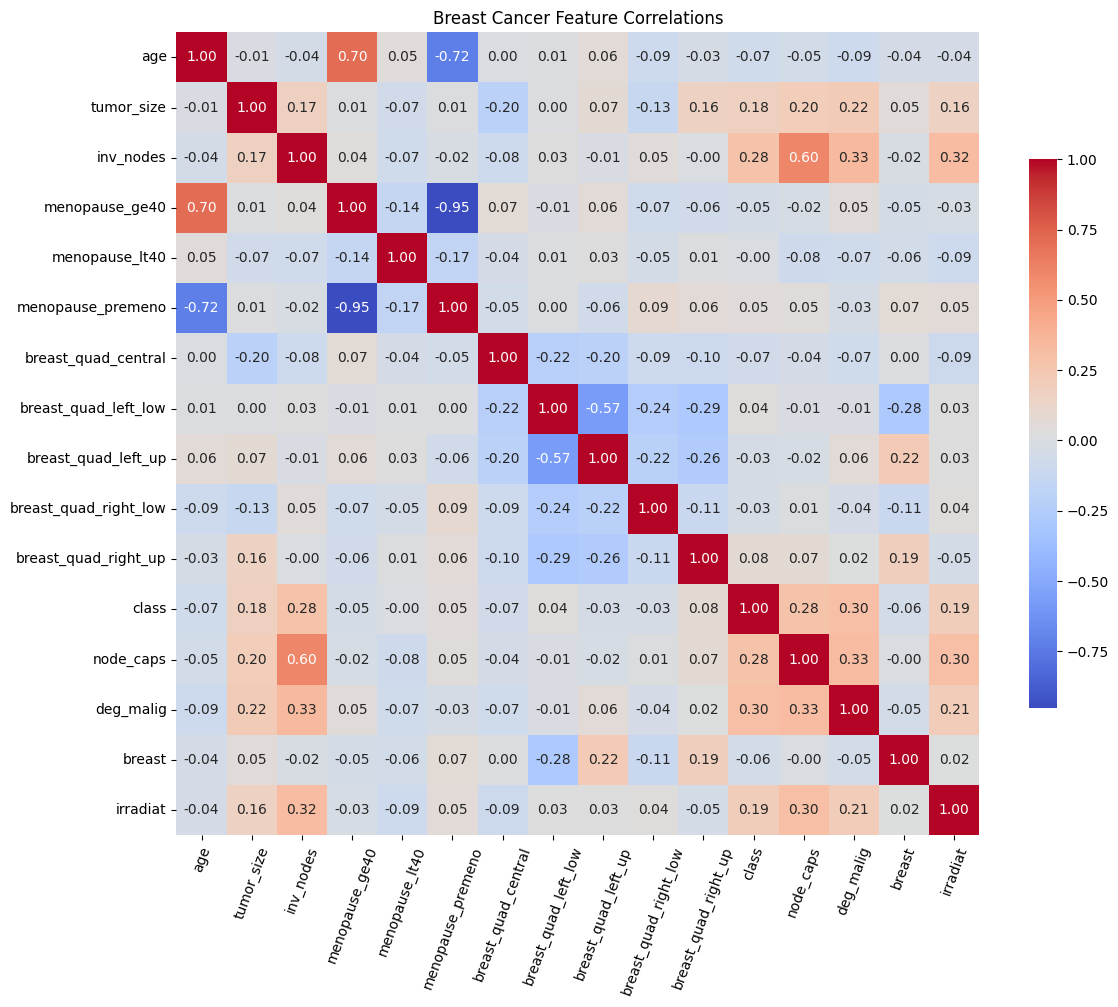

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_transformed.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.5})
plt.title("Breast Cancer Feature Correlations")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


> ***1. Possitive Correlation (Potensi Redundan):***
>* `node_caps` dan `inv_nodes` (`r = 0.60`)
Korelasi positif kuat ini menunjukkan bahwa semakin banyak kelenjar getah bening yang terlibat (`inv_nodes`), semakin besar kemungkinan terjadi infiltrasi kapsular `(node_caps`) mengindikasikan redundansi informasi yang berpotensi memicu multikolinearitas dalam model regresi.
>* `deg_malig` dan `inv_nodes` (`r = 0.33`) menggambarkan tingkat keganasan berkorelasi positif dengan jumlah node, yang juga menunjukkan relasi linear sedang yang bisa menimbulkan `multikolinearitas` jika digunakan dalam model regresi.
>* `irradiat` dan `inv_nodes` (`r = 0.32`) pasien yang menjalani terapi radiasi memiliki hubungan linier dengan jumlah kelenjar getah bening yg terserang tumoer (inv_node). Ini juga dapat berkontribusi pada overlapping features.

> ***2. Negative Correlation (One-Hot Encoding):***
>* `age` dan `menopause_lt40` `(r = -0.72)` Korelasi sangat tinggi (negatif), mengindikasikan `multikolinearitas` kuat karena menopause di bawah 40 tahun sangat bergantung pada usia, sehingga fitur `menopause_lt40` dapat didrop. Pearson Correlation [-1..1]

> ***3. Korelasi antar fitur hasil one-hot encoding pada breast_quad:***
>* `menopause_premeno` dan `menopause_ge40` (r = -0.95) → saling eksklusif, korelasi negatif sangat tinggi wajar, namun tetap bisa memicu multikolinearitas.
>* `breast_quad_left_low` vs `breast_quad_left_up` (r = -0.57)
>* Korelasi negatif antar dummy dari `breast_quad` lainnya juga terlihat.

> ***4. Korelasi terhadap Target (class):***
>* Fitur dengan korelasi  tertinggi `age (r=-0.07)`, `tumor_size (r=0.18)`, `irradiat (r=0.19)`,  `inv_nodes (r = 0.28),`, dan `deg_malig (r = 0.30)`


In [ ]:
 # gunakan baseline menghilangkan multikolinearitas
 # Salin preprocessor lama
new_preprocessor = preprocessor
# Replace hanya bagian OneHotEncoder-nya dengan drop='first'
new_preprocessor.transformers[3] = (
    'onehot',
    OneHotEncoder(drop='first'),
    ['menopause', 'breast_quad']
)

# Buat pipeline baru dengan encoder drop='first'
modeling_pipeline = Pipeline([
    ('preprocessing', new_preprocessor)
])
# Transformasi ulang data
df_model_ready = modeling_pipeline.fit_transform(df_mapped)

# Ambil nama kolom hasil one-hot encoding dengan drop='first'
new_onehot = modeling_pipeline.named_steps['preprocessing'].named_transformers_['onehot']
new_onehot_features = new_onehot.get_feature_names_out(['menopause', 'breast_quad'])

# Gabung nama kolom final
final_columns_model = ['age', 'tumor_size', 'inv_nodes'] + list(new_onehot_features) + [
    col for col in df_mapped.columns if col not in ['age', 'tumor_size', 'inv_nodes', 'menopause', 'breast_quad']
]

# Buat dataframe final untuk modeling
if hasattr(df_model_ready, 'toarray'):
    df_model_final = pd.DataFrame(df_model_ready.toarray(), columns=final_columns_model)
else:
    df_tranformed_final = pd.DataFrame(df_model_ready, columns=final_columns_model)

# Tampilkan hasil
df_tranformed_final.head()


,age,tumor_size,inv_nodes,menopause_lt40,menopause_premeno,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,class,node_caps,deg_malig,breast,irradiat
0,0.2,0.6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,0.4,0.4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
2,0.4,0.4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.8,0.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
4,0.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


>**4.2 Mutual Information**
>* **Objective**: Mutual information (MI) untuk mengukur seberapa besar informasi dari satu variabel membantu mengurangi ketidakpastian (uncertainty) terhadap variabel lainnya.
>* Dalam klasifikasi Breast Cancer, MI membantu memilih fitur paling relevan terhadap `class` target (recurrence/no-recurrence).

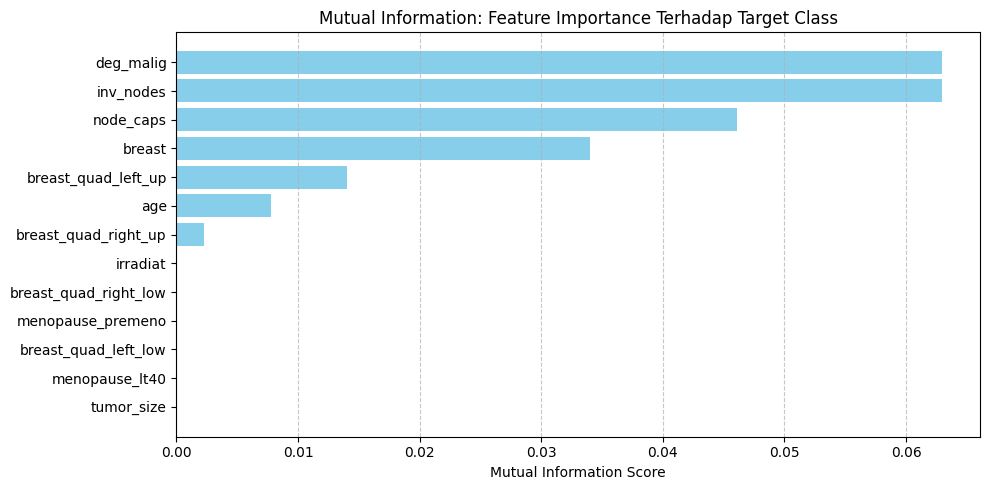

In [ ]:
df_cleaned = df_tranformed_final.astype(float)

# Pisahkan fitur dan target
X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

# Hitung mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Buat DataFrame hasil
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=True)

# Visualisasi barchart horizontal
plt.figure(figsize=(10, 5))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information: Feature Importance Terhadap Target Class')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> **Insight:**<br>
> MI tertinggi ke terendah `deg_malig`, `inv_nodes`, `node_caps`, `breast`, `breast_quad_left_up`, `age` dan `breast_quad_right_up`.
>* Fitur deg_malig, inv_nodes, dan node_caps menempati posisi teratas sebagai kontributor utama terhadap kekambuhan kanker payudara, sejalan dengan bukti klinis bahwa tingkat keganasan sel, keterlibatan kelenjar getah bening, dan invasi kapsul merupakan indikator utama agresivitas kanker.
>* Fitur breast dan breast_quad_left_up memberikan kontribusi sedang, mengindikasikan bahwa lokasi dan sisi kanker mungkin berperan dalam variasi klinis meskipun tidak secara langsung menjadi penentu utama kekambuhan.
>* Sementara itu, age dan breast_quad_right_up menunjukkan pengaruh terbatas, mencerminkan bahwa faktor usia dan lokasi kuadran tertentu tidak secara konsisten membedakan kemungkinan kekambuhan antar pasien.

>Fitur terendah `tumor_size`, `mesopause_lt40`, `breast_quat_left_low`, `mesopause_premeno`, `breast_quad_right_low` dan `irradiat`
>* `tumor_size` (ukuran tumor) tidak menunjukkan indikator sebagai kontributor terhadap kekambuhan kanker, karena ukuran tumor yang lebih besar belum tentu berbanding lurus dengan tingkat kekambuhan; secara klinis, kekambuhan lebih banyak dipengaruhi oleh penyebaran sel kanker ke kelenjar getah bening (`inv_nodes`) dan tingkat keganasan sel (`deg_malig`), sehingga ukuran tumor saja tidak cukup merepresentasikan agresivitas atau potensi kekambuhan penyakit.
>* Meskipun `irradiat` memiliki korelasi linier yang cukup dengan class, mutual information menunjukkan bahwa fitur ini tidak menyumbang informasi signifikan dalam memprediksi kekambuhan, kemungkinan karena distribusinya seragam antar kelas atau karena fungsinya sebagai variabel tindakan, bukan karakteristik biologis. `irradiat` dan `inv_nodes` memiliki korelasi linear, secara klinis, `irradiat` adalah tindakan pengobatan (treatment), bukan ciri biologis dari tumor penentu kekambuhan cancer

> **4.3 Feature Selection**

In [ ]:
# Fitur terpilih hasil feature selection (berdasarkan MI & korelasi)
selected_features = [
    'deg_malig',
    'inv_nodes',
    'node_caps',
    'breast',
    'breast_quad_left_up',
    'age',
    'breast_quad_right_up'
]

# Target kolom
target_column = 'class'

# Buat DataFrame X_final dan y dari df_transformed
X_final = df_transformed[selected_features]
y = df_transformed[target_column]

# Tampilkan 5 baris pertama
X_final.join(y).head()


,deg_malig,inv_nodes,node_caps,breast,breast_quad_left_up,age,breast_quad_right_up,class
0,3.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
1,2.0,0.0,0.0,1.0,0.0,0.4,1.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0
3,2.0,0.0,0.0,1.0,1.0,0.8,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.4,0.0,0.0


# **5. KNN & ACCURACY**
> * Train Test Split (70:30)
> * Pemilihan optimak 'k' dan decision boundries
> * Accuracy Model KNN
> * PCA
> * Visualisasi Scater Diagram

> **5.1 Train Split Test (70:30)**

In [ ]:
from sklearn.model_selection import train_test_split

# Tahap 1: Split data menjadi 70% train dan 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # supaya proporsi class tetap seimbang
)

# Tampilkan jumlah data untuk konfirmasi
{
    "Jumlah Total": len(X_final),
    "Train Set 70%": len(X_train),
    "Test Set 30%": len(X_test),

}


{'Jumlah Total': 286, 'Train Set 70%': 200, 'Test Set 30%': 86}

> **5.2 Analysis Nilai Optimum K**

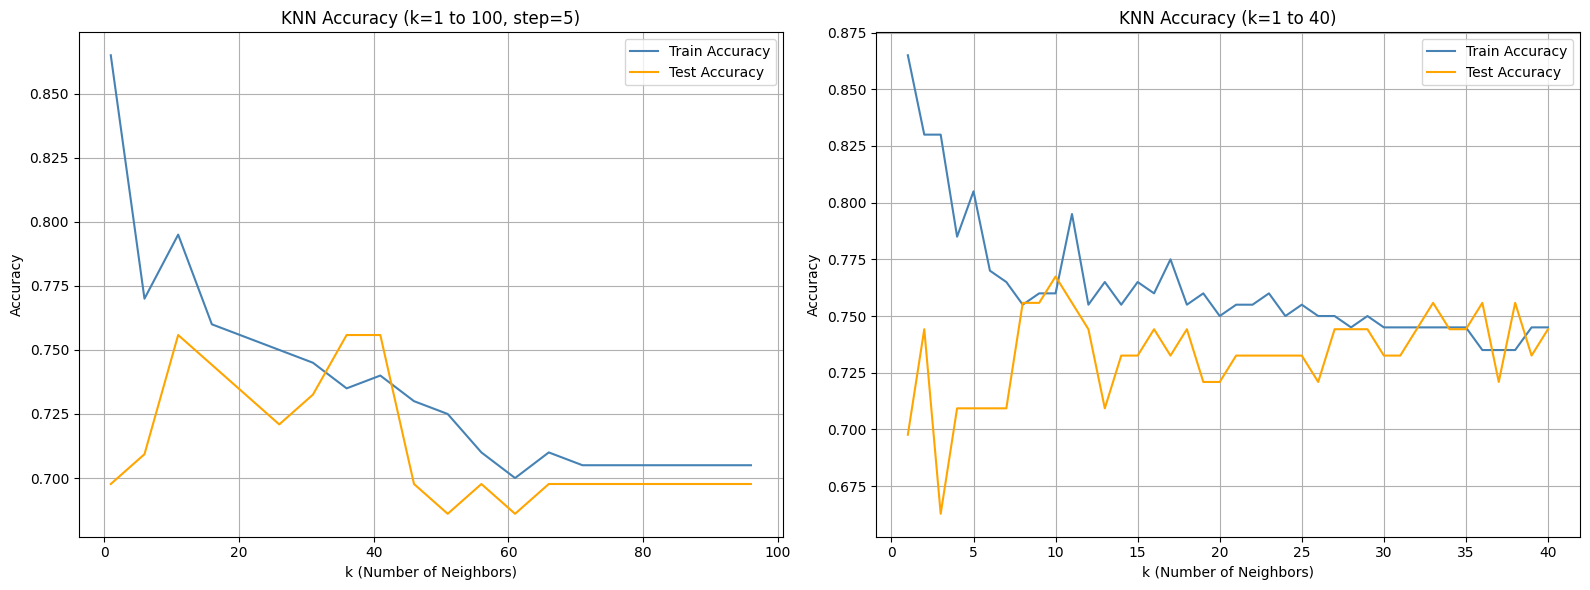

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Bersihkan data dari NaN dengan join ke target, drop, lalu pisahkan kembali
train_data = X_train.join(y_train).dropna()
test_data = X_test.join(y_test).dropna()

X_train_clean = train_data.drop(columns='class')
y_train_clean = train_data['class']
X_test_clean = test_data.drop(columns='class')
y_test_clean = test_data['class']

# Buat dua range berbeda
k_range1 = range(1, 101, 5)  # k dari 1 sampai 100, loncatan 5
k_range2 = range(1, 41)      # k dari 1 sampai 40, loncatan 1

# Siapkan list untuk hasil
results = []

for k_range in [k_range1, k_range2]:
    train_scores, test_scores = [], []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_clean, y_train_clean)
        train_pred = knn.predict(X_train_clean)
        test_pred = knn.predict(X_test_clean)
        train_scores.append(accuracy_score(y_train_clean, train_pred))
        test_scores.append(accuracy_score(y_test_clean, test_pred))
    results.append((k_range, train_scores, test_scores))

# Visualisasi hasil: 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
titles = [
    "KNN Accuracy (k=1 to 100, step=5)",
    "KNN Accuracy (k=1 to 40)"
]

for ax, (k_range, train_acc, test_acc), title in zip(axes, results, titles):
    ax.plot(k_range, train_acc, label='Train Accuracy', color='steelblue')
    ax.plot(k_range, test_acc,  label='Test Accuracy', color='orange')
    ax.set_title(title)
    ax.set_xlabel('k (Number of Neighbors)')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


>**Analysis:**
>* Nilai `k` kecil seperti 1 hingga 5 menghasilkan akurasi training tinggi (>85%) namun akurasi testing rendah `(<75%)`, yang mencerminkan overfitting—model terlalu sensitif terhadap noise dan memiliki variance tinggi, sehingga gagal melakukan generalisasi pada data baru.
>* Rentang `k = 9 hingga 13` menunjukkan keseimbangan terbaik antara bias dan variance, dengan akurasi testing yang relatif stabil (`sekitar 75–76%`) dan selisih kecil dengan akurasi training (sekitar 77–79%), menandakan model tidak overfit maupun underfit.
>* `Ketika k > 35,` terjadi penurunan akurasi pada data uji `(<73%)` dan training (<75%) mengindikasikan underfitting akibat model menjadi terlalu sederhana dan kehilangan sensitivitas terhadap pola penting dalam data.
>* Dengan mempertimbangkan kestabilan akurasi, risiko overfitting, dan kemampuan generalisasi, nilai **k = 11** dipilih sebagai parameter optimal karena memberikan akurasi test yang baik 76%

> **4.3 KNN (K-Nearest Neighbors) & Accuracy**

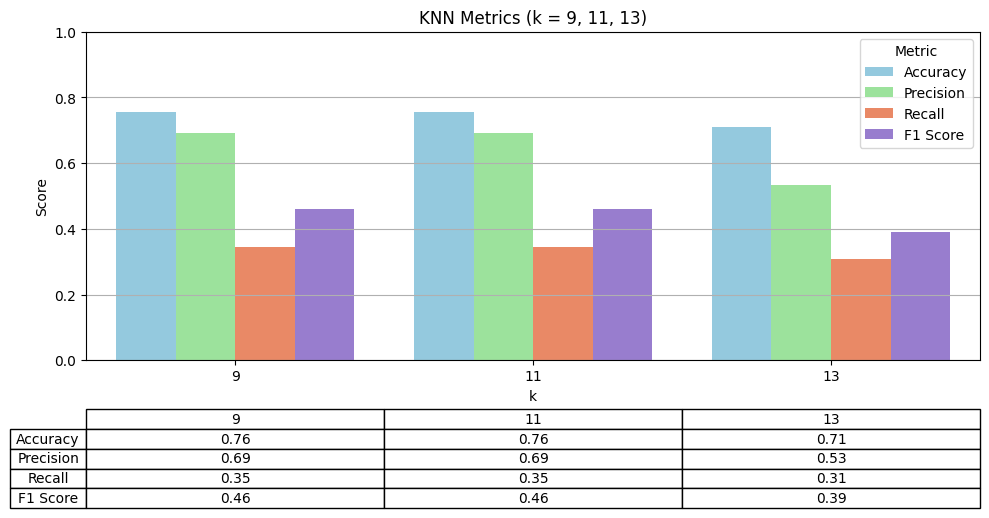

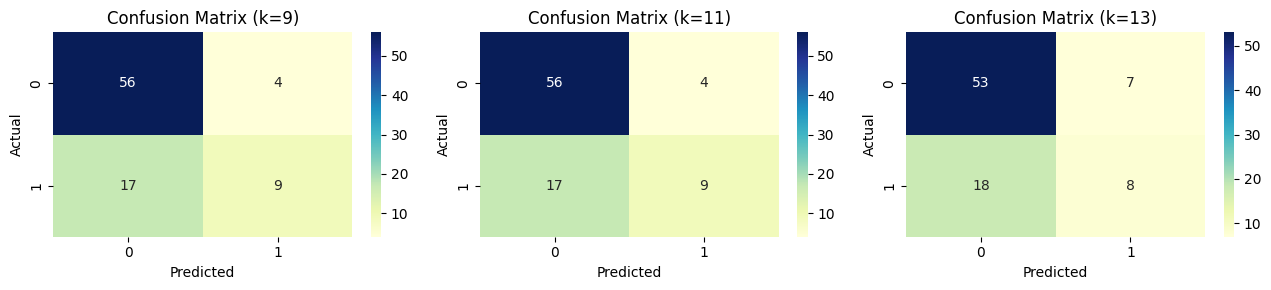

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Siapkan dictionary untuk menyimpan hasil metrik
metrics_result = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'conf_matrix': []
}

# Loop untuk k = 9, 11, 13
for k in [9, 11, 13]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clean, y_train_clean)
    y_pred = knn.predict(X_test_clean)

    # Simpan metrik
    metrics_result['k'].append(k)
    metrics_result['accuracy'].append(accuracy_score(y_test_clean, y_pred))
    metrics_result['precision'].append(precision_score(y_test_clean, y_pred))
    metrics_result['recall'].append(recall_score(y_test_clean, y_pred))
    metrics_result['f1_score'].append(f1_score(y_test_clean, y_pred))
    metrics_result['conf_matrix'].append(confusion_matrix(y_test_clean, y_pred))

# Konversi ke DataFrame
metrics_df = pd.DataFrame({
    'k': metrics_result['k'],
    'Accuracy': metrics_result['accuracy'],
    'Precision': metrics_result['precision'],
    'Recall': metrics_result['recall'],
    'F1 Score': metrics_result['f1_score']
})

# Visualisasi Bar Chart + Table
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bar chart
metrics_df_melted = metrics_df.melt(id_vars='k', var_name='Metric', value_name='Score')
custom_palette = {
    'Accuracy': 'skyblue',
    'Precision': 'lightgreen',
    'Recall': 'coral',
    'F1 Score': 'mediumpurple'
}
sns.barplot(data=metrics_df_melted, x='k', y='Score', hue='Metric', palette=custom_palette, ax=ax)
ax.set_title('KNN Metrics (k = 9, 11, 13)')
ax.set_ylim(0, 1)
ax.legend(title='Metric')
ax.grid(axis='y')

# Tambahkan tabel di bawah grafik
table_data = metrics_df.set_index('k').round(2).T
table = plt.table(cellText=table_data.values,
                  rowLabels=table_data.index,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  rowLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.45, 1, 0.3])  # [left, bottom, width, height]
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(left=0.1, bottom=0.35)
plt.tight_layout()
plt.show()

# Plot confusion matrices secara terpisah
fig, axes = plt.subplots(1, 3, figsize=(13, 3))
for ax, k, cm in zip(axes, metrics_result['k'], metrics_result['conf_matrix']):
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(f'Confusion Matrix (k={k})')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


> **4C. KNN Classification untuk variasi k**

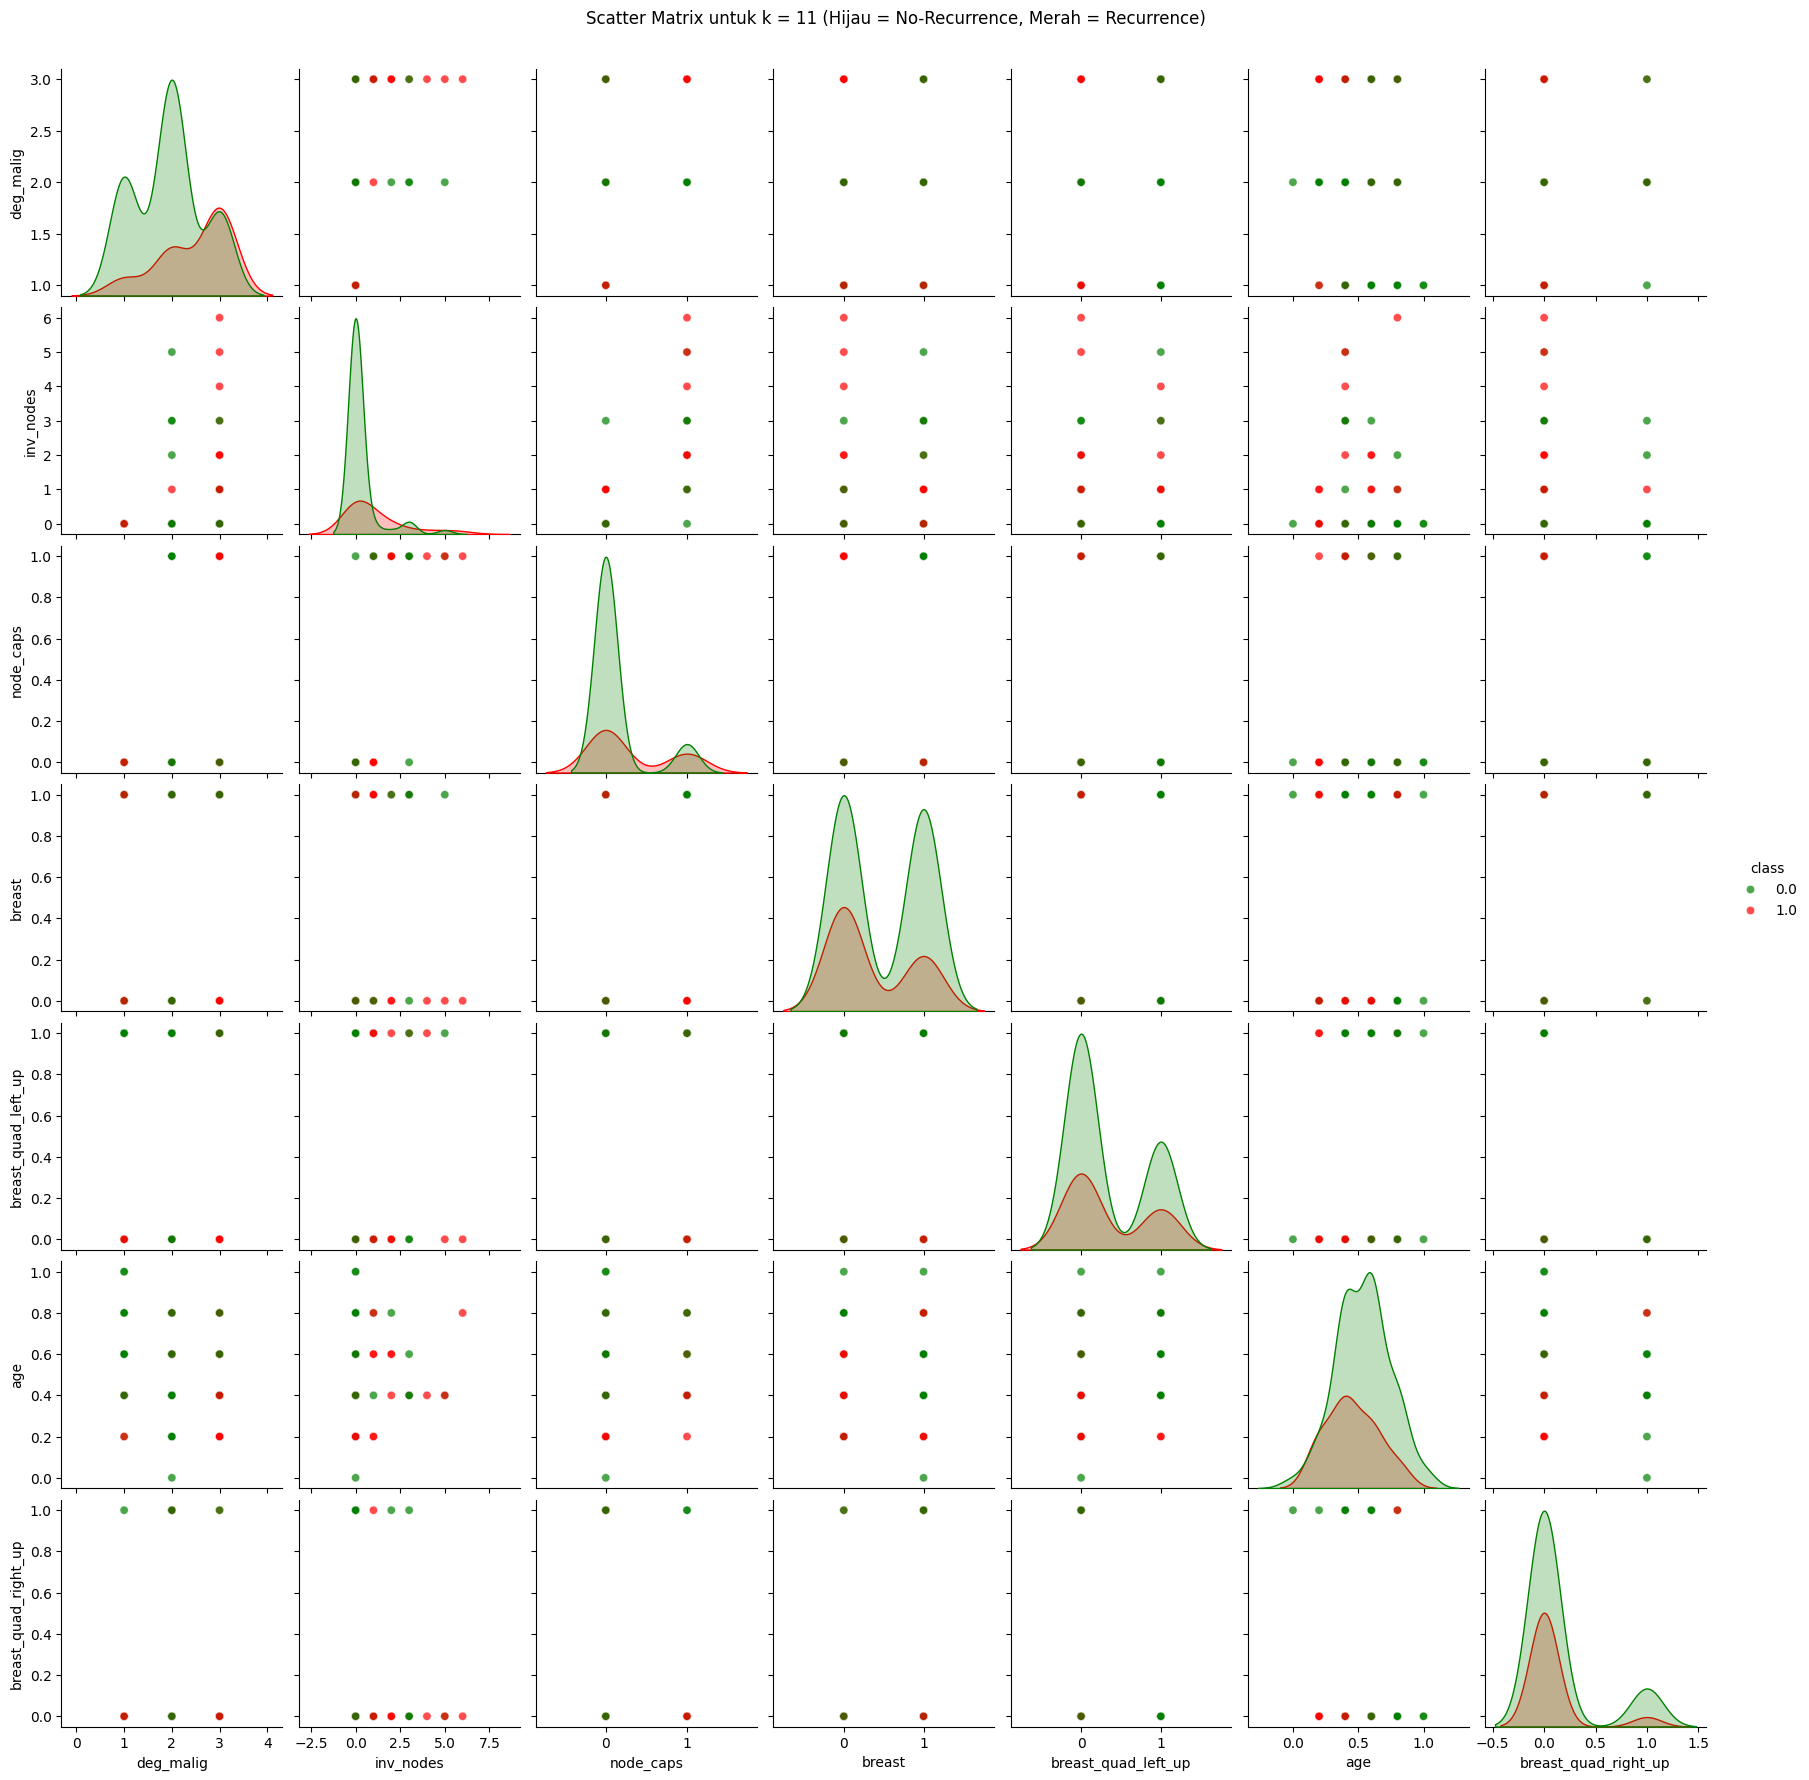

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Ambil prediksi KNN untuk k=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_clean, y_train_clean)
y_pred_k11 = knn.predict(X_test_clean)

# Gabungkan X_test_clean dan prediksi
df_k11 = X_test_clean.copy()
df_k11['class'] = y_test_clean.values
df_k11['predicted'] = y_pred_k11

# Buat scatter matrix (pairplot) dengan warna sesuai class
# Warna: hijau = 0 (no-recurrence), merah = 1 (recurrence)
palette = {0: 'green', 1: 'red'}
plot = sns.pairplot(df_k11.drop(columns='predicted'), hue='class', palette=palette, plot_kws={'alpha': 0.7})
plot.fig.suptitle("Scatter Matrix untuk k = 11 (Hijau = No-Recurrence, Merah = Recurrence)", y=1.02)
plt.show()


# **6. PCA (Principle Componenet Analysis)**

**6.1 PCA 3D Visualization**

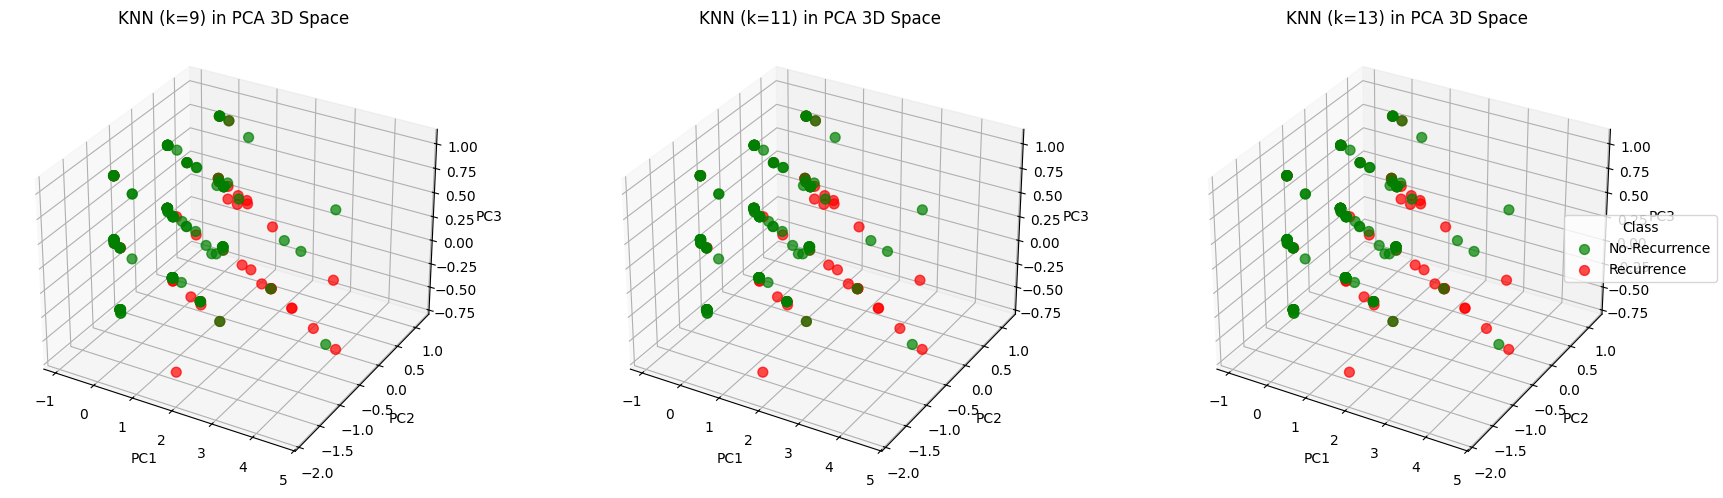

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Jalankan PCA ke 3 dimensi
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_clean)

# Warna class
cmap_bold = {0: 'green', 1: 'red'}

# Setup plot
fig = plt.figure(figsize=(18, 5))
k_values = [9, 11, 13]

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_pca_3d, y_train_clean)
    y_pred = knn.predict(X_pca_3d)

    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    for class_value in [0, 1]:
        idx = y_train_clean == class_value
        ax.scatter(X_pca_3d[idx, 0], X_pca_3d[idx, 1], X_pca_3d[idx, 2],
                   color=cmap_bold[class_value], label=f'Class {class_value}', alpha=0.7, s=50)

    ax.set_title(f'KNN (k={k}) in PCA 3D Space')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.grid(True)

# Legend hanya sekali
fig.legend(['No-Recurrence', 'Recurrence'], loc='center right', title='Class')
plt.tight_layout()
plt.show()


**6.2 PCA 2D Visualization**

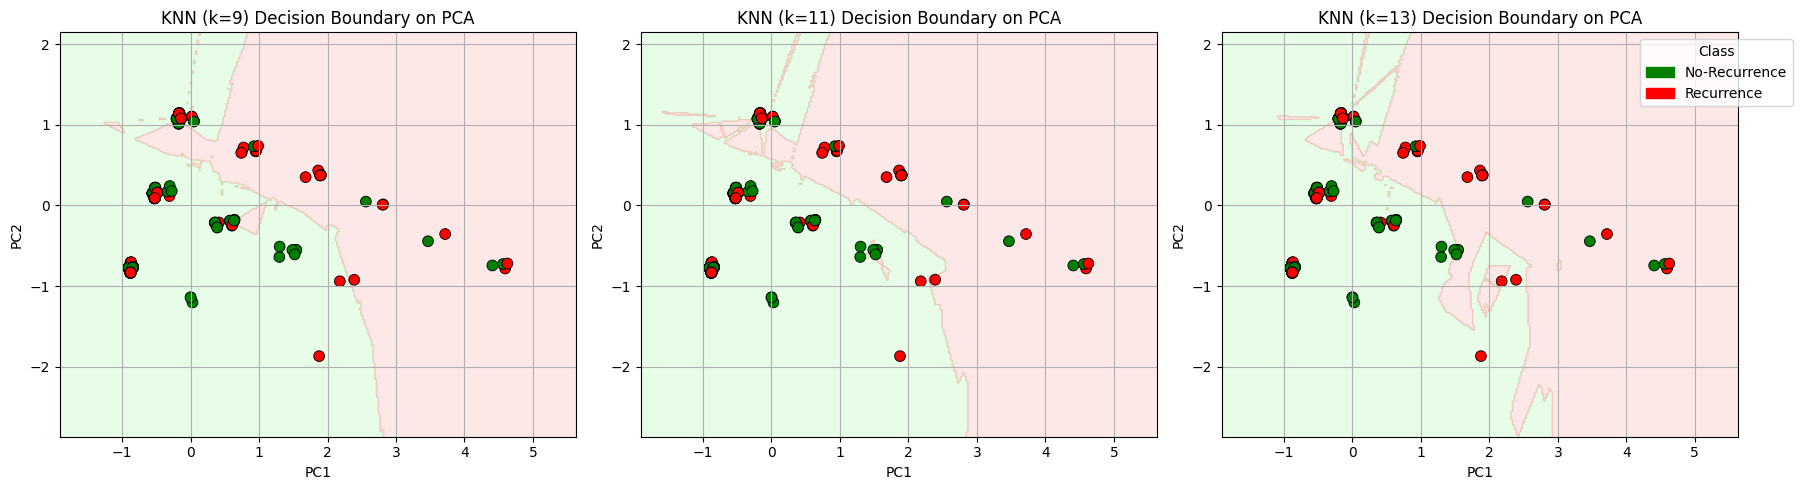

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import numpy as np

# PCA dari X_train_clean (fitur yang sudah dibersihkan)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_clean)
y_train_array = y_train_clean.values

# Warna background dan titik
cmap_light = ListedColormap(['#b2fab4', '#fbb6b6'])  # background decision
cmap_bold = {0: 'green', 1: 'red'}  # titik data

# Buat meshgrid untuk boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Setup plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
k_values = [9, 11, 13]

for ax, k in zip(axes, k_values):
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_pca, y_train_array)

    Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train_array,
                    palette=cmap_bold, s=60, edgecolor='black', ax=ax, legend=False)

    ax.set_title(f'KNN (k={k}) Decision Boundary on PCA')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True)

# Legend manual
legend_labels = [Patch(color='green', label='No-Recurrence'), Patch(color='red', label='Recurrence')]
plt.legend(handles=legend_labels, title='Class', loc='upper right', bbox_to_anchor=(1.12, 1))
plt.tight_layout()
plt.show()
